<a href="https://colab.research.google.com/github/Vraj1103/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=0b46bf207c6b2e1d4cf7dc2cd9e7fc5ab0c6318d6e87a485fbdacb5d0b39edf8
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [8]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-imd_acpf
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-imd_acpf
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=3620a85796127338271685f766f9be4eb8a867e3d37bc89c6bf9838dd332594b
  Stored in directory: /tmp/pip-ephem-wheel-cache-3cbq1kde/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


##sentiment analysis with the pipeline


In [10]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

data = ['i love you','i hate you']

sentiment_pipeline(data)

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
cannot import name 'ACCELERATE_MIN_VERSION' from 'transformers.utils' (/usr/local/lib/python3.10/dist-packages/transformers/utils/__init__.py)

##Data loading and pre-processing

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Dataset.csv")
df = df.sample(10_000)
df.head()

,review,sentiment
15242,"Any movie that offers Bonnie Hunt, Sarah Silve...",positive
48838,"I thought it was weird and just gory, not scar...",negative
33049,"typically, a movie can have factors like ""arou...",positive
43454,I have nothing more to say but it was awful. I...,negative
18329,I caught this movie at a small screening held ...,negative


In [ ]:
df.shape
df.isnull().sum()

###Pre-processing

In [13]:
df['word_count']=df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts']=df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength']=df['review'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts']=df['review'].apply(lambda x: ps.get_stopwords_counts(x))

In [14]:
df.head()
df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


<Axes: >

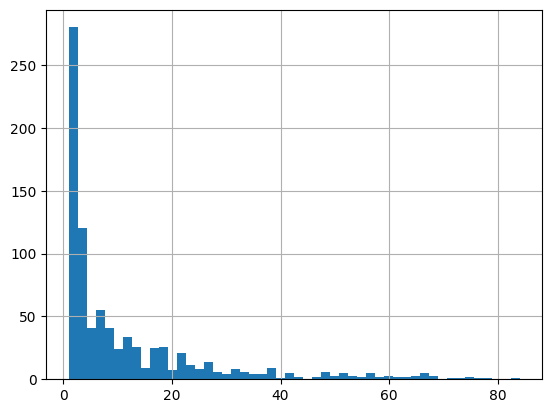

In [15]:
df['word_count'].value_counts().hist(bins=50)

##Data Preparation for ML

In [17]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [33]:
class CustomDataset(Dataset):
  def __init__(self,texts,labels,tokenizer,max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self,idx):
    text = str(self.texts[idx])
    label = str(self.labels[idx])

    encoding = self.tokenizer(text,truncation=True,padding = "max_length",max_length=self.max_len)

    return{
        'input_ids':encoding['input_ids'],
        'attention_mask':encoding['attention_mask'],
        'labels':label
    }



###Prepare tokenizer and model

In [34]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=2).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
X = df['review'].tolist()

label2id = {'positive':1,'negative':0}
id2label = {1:'positive',0:'negative'}

y = df['sentiment'].map(label2id).tolist()

dataset = CustomDataset(X,y,tokenizer)

In [39]:
train_dataset,test_dataset = train_test_split(dataset,test_size=0.2,random_state=42)